## 이산형 확률분포

## 이산형 확률분포

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline


### 이산확률분포의 정의
불공정한 주사위는 다음의 확률 분포를 따른다.

|눈 |1 | 2 | 3 | 4 | 5 | 6 |
|---|---|---|---|---|---|---|
|확률|1/21|2/21|3/21|4/21|5/21|6/21|

확률변수를 다음과 같이 구현한다.

In [2]:
x_set = np.array([1, 2, 3, 4, 5, 6])

In [3]:
def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0

In [4]:
# 확률변수가 취할 수 있는 값의 집합과 확률변수의 세트가 확률분포이다. 
X = [x_set, f]

확률변수로부터 확률을 구할 수 있다. 확률변수와 확률을 dictionary 형태로 표시한다.

In [5]:
# 확률 p_k를 구한다
prob = np.array([f(x_k) for x_k in x_set])
# x_k와 p_k의 대응을 사전식으로 표시
dict(zip(x_set, prob))

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

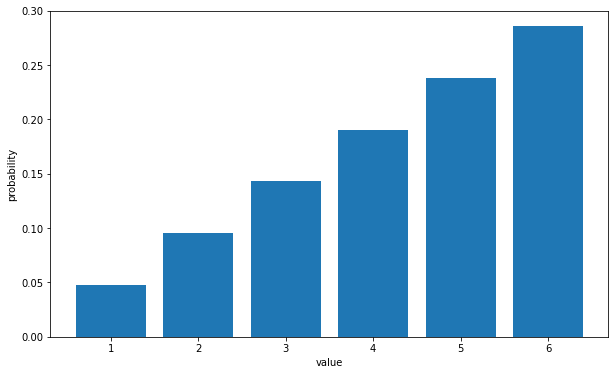

In [6]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel('value')
ax.set_ylabel('probability')

plt.show()

### 이산형 확률 분포의 성질
확률은 0 ~ 1 사이이 값을 가진다.  
확률의 총합은 1이다. 

In [7]:
np.all(prob >= 0)

True

In [24]:
np.sum(prob) # 1 이다

0.9999999999999999

### 누적분포 함수 
확률변수 X가 x 이하가 될 확률을 반환한다.
$$ F(x) = P(X \le x ) = \sum_{ x_i\le x}P(x)$$

In [9]:
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [10]:
# 주사위의 눈이 3이하가 될 확률
F(3)

0.2857142857142857

### 이산형 확률변수의 기대값과 분산

#### 기대값
관측될 것이라고 기대되는 관측값에 대한 평균이므로 기대값이라고 한다.  
확률변수의 값과 그 확률의 곱의 총합이 기대값이다. 
$$ E(X) = \sum_k x_k f(x_k)$$

앞선 불공정한 주사위의 기대값을 계산하면 다음과 같다.

In [11]:
np.sum([x_k * f(x_k) for x_k in x_set])

4.333333333333333

10000번 주사위를 굴렸을때 주사위의 평균은 같은 값이 나오는가?

In [12]:
sample = np.random.choice(x_set, 10000, p=prob)
np.mean(sample)

4.3434

#### 기대값의 성질

$$ E(aX +b) = aE(X) + b$$

이산형 확률변수의 기대값을 리턴하는 함수를 만들자. 이때 g인수는 확률변수의 변환함수이다. 

In [13]:
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [14]:
E(X)

4.333333333333333

Y = 2X + 3의 기대값은 다음과 같이 계산할 수 있다. 

In [15]:
E(X, g=lambda x: 2*x + 3)

11.666666666666664

E(2X+3)은 2E(x)+3과 같은 값을 가진다.

In [16]:
2 * E(X) + 3

11.666666666666666

#### 이산형 확률 분포의 분산
확률변수의 분사으로 분포의 산포도를 나타내는 지표이다. 이산형 확률분포의 분산은 다음 식과 같이 편차제곱의 기대값으로 정의된다. 여기서 $ \mu $는 확률 변수 X의 기대값(평균)을 말한다. 

$$ Var(X) = \sum_k (x_k - \mu)^2 f(x_k) $$



In [17]:
mean = E(X)
np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])

2.2222222222222223

이 수식을 다음과 같은 분산의 함수로 구현할 수 있다. 여기서 인수 g는 확률변수에 대한 변환이다.  

In [18]:
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

In [19]:
V(X)

2.2222222222222223

#### 분산의 성질

$$ Var(aX + b) = a^2Var(X) $$

확률변수 Y = 2X + 3의 분산은 다음과 같이 계산할 수 있다.

In [20]:
V(X, lambda x: 2*x + 3)

8.88888888888889

Y = 2X + 3 의 분산은 $ 2^2 Var(X) $가 됨을 알 수 있다.

In [21]:
2**2 * V(X)

8.88888888888889